# Deterministic generation

In [45]:
!pip install diffusers transformers ftfy accelerate

import PIL
import torch
from io import BytesIO
from diffusers.utils import load_image, make_image_grid
import matplotlib.pyplot as plt
from diffusers import DiffusionPipeline


In [46]:
prompt = "A beautiful oil painting of a singular lighthouse, shining its light across a tumultuous sea"

pipe = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


Now, define four different `Generator`'s and assign each `Generator` a seed (`0` to `3`) so you can reuse a `Generator` later for a specific image:

In [47]:
generator = [torch.Generator(device="cuda").manual_seed(i) for i in range(4)]

Generate the images and have a look:

  0%|          | 0/50 [00:00<?, ?it/s]

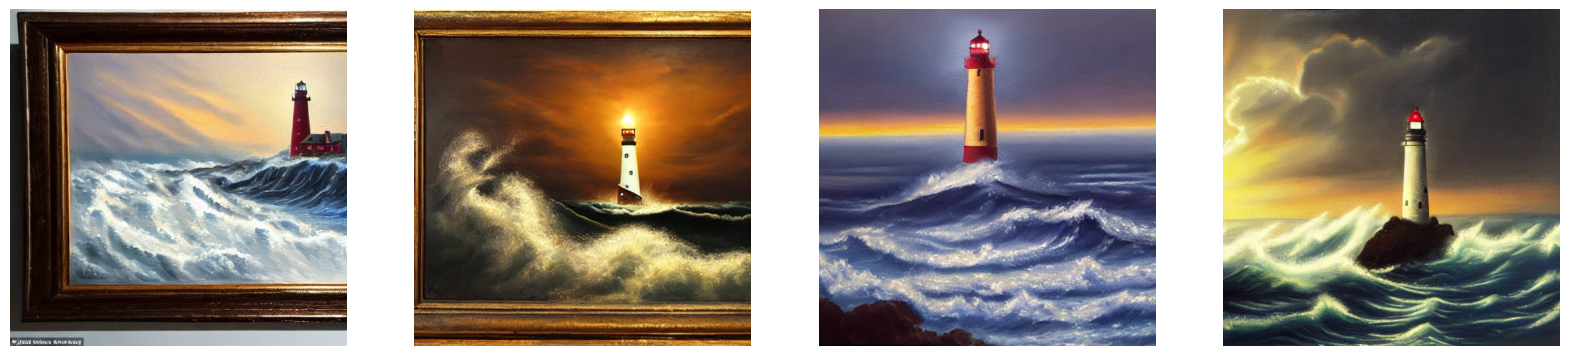

In [48]:
images = pipe(prompt, generator=generator, num_images_per_prompt=4).images

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Display each image
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')  # Turn off axis

plt.show()

In [49]:
prompt = [prompt + t for t in [", highly realistic", ", artsy", ", trending", ", colorful"]]
generator = [torch.Generator(device="cuda").manual_seed(2) for i in range(4)]

Create four generators with seed `0`, and generate another batch of images, all of which should look like the first image from the previous round!

  0%|          | 0/50 [00:00<?, ?it/s]

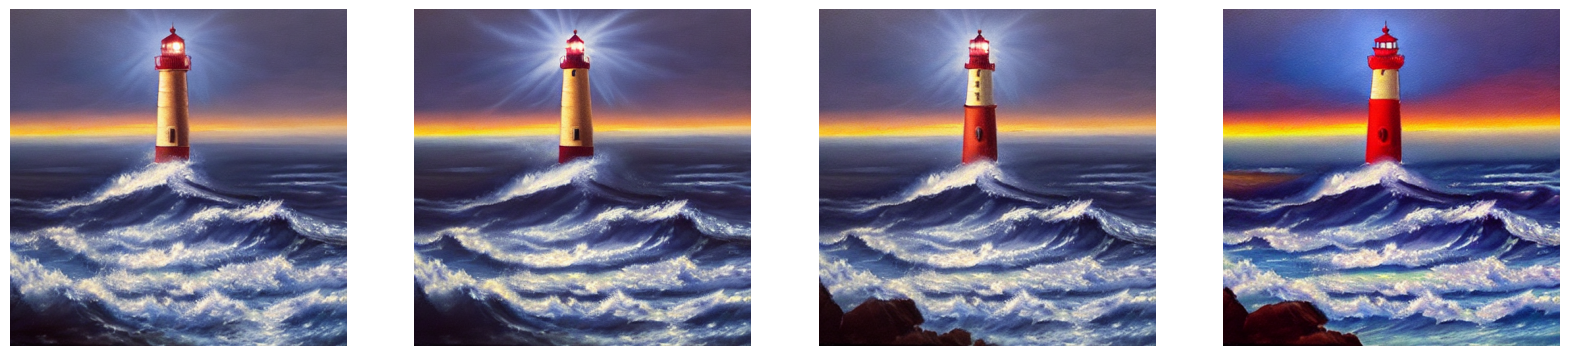

In [50]:
images = pipe(prompt, generator=generator).images

fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Adjust the size as needed

# Display each image
for i, img in enumerate(images):
    axs[i].imshow(img)
    axs[i].axis('off')  # Turn off axis

plt.show()

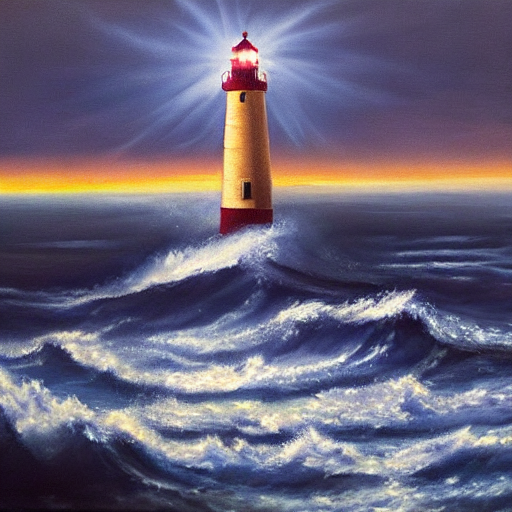

In [51]:
images[1]

In [ ]:
#